_________________________________
---------------------------------
tethaaaa 
 [0. 0. 0.]
------------------------
cost =  0.6931471805599453
result= (array([-6.25031153,  0.75571063,  0.05284021]), 40, 1)
result 0 = [-6.25031153  0.75571063  0.05284021]
cost after optimize =  0.4332696749628746

accuracy = 82


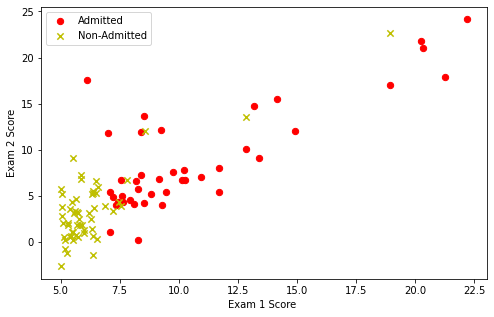

In [2]:
import  numpy as np
import pandas as pd 
import matplotlib.pyplot as plt


path = 'C:\\pp.txt'

data= pd.read_csv(path, header=None, 
                  names=['Exam1','Exam2','Admetted']) 


# print('data = ' )
# print(data.head(10))
# print('_________________________________')

# print('data descibe = ' )
# print(data.describe())
print('_________________________________')
prons = data[data['Admetted'].isin([1])]
cons = data[data['Admetted'].isin([0])]

# p=print
# p('Admitted stedent \n',prons)
# print('_________________________________')
# p('Non Admitted student \n',prons)

# print('___Drawing_______________________')

fig,ax = plt.subplots(figsize=(8,5))
ax.scatter(prons['Exam1'], prons['Exam2'],
          s=40 ,c='r', marker='o', label='Admitted')
ax.scatter(cons['Exam1'], cons['Exam2'],
          s=40 ,c='y', marker='x', label='Non-Admitted')

#lebling
ax.legend()
ax.set_xlabel('Exam 1 Score ')
ax.set_ylabel('Exam 2 Score')

def sigmoid(h):
    return 1/(1+np.exp(-h))


# numbers =np.arange(-10, 10 , step=2)

# fig,ax = plt.subplots(figsize=(8,5))
# ax.plot(numbers, sigmoid(numbers),'b')
# print('numbers =\n' ,numbers)


#add col wiht 1 value
data.insert(0,'Ones',1)

print('---------------------------------')

# set x training data and y taget vaiable
cols=data.shape[1]
x= data.iloc[:, :cols-1]
y=data.iloc[:, cols-1:cols]

# print('x \n',x)
# print('y \n',y)

#convert to numpy array and initiali we thne parameter array theta
x=np.array(x.values)
y=np.array(y.values)
theta=np.zeros(3) # 3 features 

print('tethaaaa \n',theta)
# print('y \n',y)
#cost function

def costJ(thetaj, xj , yj):
    thetaj = np.matrix(thetaj)
    xj=np.matrix(xj)
    yj=np.matrix(yj)
    
    first= np.multiply(-yj, np.log(sigmoid(xj * thetaj.T)))
    second = np.multiply((1-yj) , np.log(1- sigmoid(xj * thetaj.T)))
    return np.sum( first - second)/ (len(xj))


thiscost= costJ(theta, x , y)
print('------------------------')
print('cost = ', thiscost)


def gradient(thetaG , xG , yG):
    thetaG= np.matrix(thetaG)
    xG= np.matrix(xG)
    yG= np.matrix(yG)
    
    parameters = int(thetaG.ravel().shape[1] ) # force theta for being in vertically 1 D array

    grad= np.zeros(parameters)
#     print('graaaaaaaaaaaaaaaaad:',c)

    error = sigmoid(xG * thetaG.T) - yG
    
    for i in range(parameters):
#         print("{} \n {} ".format(0,xG[:,i]))
        term = np.multiply( error, xG[:,i])
        grad[i] = np.sum(term)/len(xG)
        
    return grad
    
import scipy.optimize as opt

result = opt.fmin_tnc(func= costJ ,x0=theta,
                 fprime= gradient , args=(x,y))#to get the optimum values
print('result=',result)

costafteroptimize = costJ(result[0],x,y)
print('result 0 =',result[0])
print('cost after optimize = ',costafteroptimize)
print()

#know the degree of the effecincy
def predict(theta , x):
    probabilty = sigmoid( x* theta.T)
    return [1 if x>=0.5 else 0 for x in probabilty]

theta_min = np.matrix(result[0])
predictions = predict(theta_min,x)
correct = [1 if ((a==1 and b == 1) or
                (a==0 and b==0)) else 0 
          for (a,b) in zip(predictions,y)]
accuracy=(sum(map(int,correct)) % len(correct))
print('accuracy = {0}'.format(accuracy))